In [5]:
from openpyxl import Workbook
from pathlib import Path

In [3]:
from openpyxl import load_workbook
my_excel_file = Path.cwd () / "TSD Foundation Reaction Export.xlsx"   #Changed to this because it is saved in the current directory.
wb = load_workbook(my_excel_file)
ws = wb.active

In [4]:
ws

<Worksheet "Foundation Reactions">

1 (Final) STR1-1.35G


In [9]:
##ChatGPt Response:

Maximum Fx: 139.300474805194 kN, Combination: 76 (Final) STR13.34-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+EHFDir1-
Maximum Fy: 175.049265079928 kN, Combination: 81 (Final) STR13.39-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+EHFDir2-
Maximum Fz: 461.758173453477 kN, Combination: 87 1.15G + 1.5(0.6)W180-1 + 1.5 S


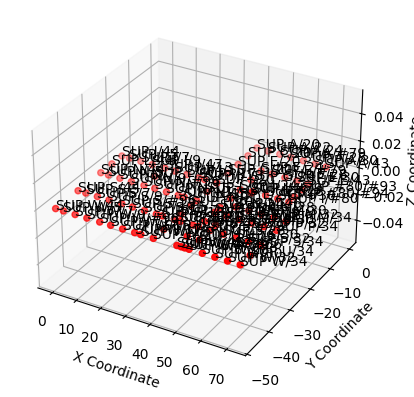

In [11]:
import openpyxl
import matplotlib.pyplot as plt

def read_excel(file_path):
    wb = openpyxl.load_workbook(file_path, data_only=True)
    sheet = wb.active

    supports = []
    reactions = []

    for row in sheet.iter_rows(min_row=6, values_only=True):
        if row[0] and isinstance(row[0], str) and row[0].startswith("SUP"):
            support = {
                'name': row[0],
                'x': row[1],
                'y': row[2],
                'z': row[3],
                'reactions': []
            }
            supports.append(support)
        elif row[0] is None and row[7] is not None:
            reaction = {
                'combination': row[7],
                'Fx': row[8],
                'Fy': row[9],
                'Fz': row[10],
                'Mx': row[11],
                'My': row[12],
                'Mz': row[13]
            }
            supports[-1]['reactions'].append(reaction)

    return supports

def find_max_reactions(supports):
    max_reactions = {'Fx': (-float('inf'), None), 'Fy': (-float('inf'), None), 'Fz': (-float('inf'), None)}
    
    for support in supports:
        for reaction in support['reactions']:
            if reaction['Fx'] > max_reactions['Fx'][0]:
                max_reactions['Fx'] = (reaction['Fx'], reaction['combination'])
            if reaction['Fy'] > max_reactions['Fy'][0]:
                max_reactions['Fy'] = (reaction['Fy'], reaction['combination'])
            if reaction['Fz'] > max_reactions['Fz'][0]:
                max_reactions['Fz'] = (reaction['Fz'], reaction['combination'])
    
    return max_reactions

def plot_support_coordinates(supports):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x_coords = [support['x'] for support in supports]
    y_coords = [support['y'] for support in supports]
    z_coords = [support['z'] for support in supports]
    
    ax.scatter(x_coords, y_coords, z_coords, c='r', marker='o')
    
    for support in supports:
        ax.text(support['x'], support['y'], support['z'], support['name'])
    
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    plt.show()

# Main Function
if __name__ == "__main__":
    file_path = 'TSD Foundation Reaction Export.xlsx'
    supports = read_excel(file_path)
    max_reactions = find_max_reactions(supports)

    print(f"Maximum Fx: {max_reactions['Fx'][0]} kN, Combination: {max_reactions['Fx'][1]}")
    print(f"Maximum Fy: {max_reactions['Fy'][0]} kN, Combination: {max_reactions['Fy'][1]}")
    print(f"Maximum Fz: {max_reactions['Fz'][0]} kN, Combination: {max_reactions['Fz'][1]}")

    plot_support_coordinates(supports)


In [12]:
# Asked ChatGPT to save everything in a data frame which can be accessed and used when requried. 

In [6]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd


my_excel_file = Path.cwd () / "TSD Foundation Reaction Export.xlsx"   #Changed to this because it is saved in the current directory.
wb = load_workbook(my_excel_file)
ws = wb.active


df = pd.DataFrame(data=ws.values)

NameError: name 'load_workbook' is not defined

## ChatGPT response 01

The code below successfuly reads the excel sheet and in place where there are merged cells it populates it with the same value using 


In [1]:
import pandas as pd

# Load the Excel file
file_path = 'TSD Foundation Reaction Export.xlsx'

# Load the data, skipping the initial rows until the header row
df_data = pd.read_excel(file_path, sheet_name='Foundation Reactions', skiprows=7, header = None)

df_data.columns = ['Support', "X Coordinate", "Y Coordinate", "Z Coordinate", "TBR", "TBR", "TBR", "Combination", "Fx [kN]", "Fy [kN]", "Fz [kN]", "Mx [kNm]", "My [kNm]", "Mz [kNm]"]


In [2]:
df_data

,Support,X Coordinate,Y Coordinate,Z Coordinate,TBR,TBR,TBR,Combination,Fx [kN],Fy [kN],Fz [kN],Mx [kNm],My [kNm],Mz [kNm]
0,SUP 20/#101,38.587,-35.368,0.0,SC 20/#101,HEB260,0.0,1 (Final) STR1-1.35G,0.010803,0.032188,95.035537,0.0,0.0,-0.000025
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 (Final) STR3-1.353ξG+1.5Q+1.5RQ,0.016249,0.047277,124.858870,0.0,0.0,-0.000042
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 (Final) STR11.1-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873413,0.031037,141.048133,0.0,0.0,0.002906
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 (Final) STR11.2-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873148,0.028175,137.004751,0.0,0.0,0.002891
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 (Final) STR11.3-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.851752,0.052938,129.376196,0.0,0.0,0.003944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,Wall Supports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10296,No results available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10298,Core Supports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing un-necessary columns to simplify table.

To do this the drop method is used.

In [2]:
df_data.drop(df_data.columns[[4, 5, 6]], axis=1, inplace=True)

In [3]:
df_data

,Support,X Coordinate,Y Coordinate,Z Coordinate,Combination,Fx [kN],Fy [kN],Fz [kN],Mx [kNm],My [kNm],Mz [kNm]
0,SUP 20/#101,38.587,-35.368,0.0,1 (Final) STR1-1.35G,0.010803,0.032188,95.035537,0.0,0.0,-0.000025
1,NaN,NaN,NaN,NaN,2 (Final) STR3-1.353ξG+1.5Q+1.5RQ,0.016249,0.047277,124.858870,0.0,0.0,-0.000042
2,NaN,NaN,NaN,NaN,3 (Final) STR11.1-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873413,0.031037,141.048133,0.0,0.0,0.002906
3,NaN,NaN,NaN,NaN,4 (Final) STR11.2-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873148,0.028175,137.004751,0.0,0.0,0.002891
4,NaN,NaN,NaN,NaN,5 (Final) STR11.3-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.851752,0.052938,129.376196,0.0,0.0,0.003944
...,...,...,...,...,...,...,...,...,...,...,...
10295,Wall Supports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10296,No results available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10298,Core Supports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing the last 7 rows

In [4]:
df_data = df_data.iloc[:-7]

In [5]:
df_data

,Support,X Coordinate,Y Coordinate,Z Coordinate,Combination,Fx [kN],Fy [kN],Fz [kN],Mx [kNm],My [kNm],Mz [kNm]
0,SUP 20/#101,38.587,-35.368,0.0,1 (Final) STR1-1.35G,0.010803,0.032188,95.035537,0.0,0.0,-0.000025
1,NaN,NaN,NaN,NaN,2 (Final) STR3-1.353ξG+1.5Q+1.5RQ,0.016249,0.047277,124.858870,0.0,0.0,-0.000042
2,NaN,NaN,NaN,NaN,3 (Final) STR11.1-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873413,0.031037,141.048133,0.0,0.0,0.002906
3,NaN,NaN,NaN,NaN,4 (Final) STR11.2-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873148,0.028175,137.004751,0.0,0.0,0.002891
4,NaN,NaN,NaN,NaN,5 (Final) STR11.3-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.851752,0.052938,129.376196,0.0,0.0,0.003944
...,...,...,...,...,...,...,...,...,...,...,...
10288,NaN,NaN,NaN,NaN,95 1.5(0.6)W90-2 + 1.5 S,1.831753,-3.795580,4.263824,0.0,0.0,3.127207
10289,NaN,NaN,NaN,NaN,96 1.5(0.6)W180-1 + 1.5 S,17.620236,0.491868,37.290263,0.0,0.0,-0.442495
10290,NaN,NaN,NaN,NaN,97 1.5(0.6)W180-2 + 1.5 S,17.579838,0.491868,37.166937,0.0,0.0,-0.442476
10291,NaN,NaN,NaN,NaN,98 1.5(0.6)W270-1 + 1.5 S,0.550030,0.363049,1.922085,0.0,0.0,-0.289203


## Now to fill the NaN gaps due to merged cells

This can be achieved using the ffill() method.

In [6]:
# This method fills in the NaN in the merged cells.

df_data_first_part = df_data.iloc[:, :4]
df_data_rest = df_data.iloc[:, 4:]

df_data_first_part = df_data_first_part.ffill(axis = 0)

df_data = pd.concat([df_data_first_part, df_data_rest], axis=1)

In [7]:
df_data

,Support,X Coordinate,Y Coordinate,Z Coordinate,Combination,Fx [kN],Fy [kN],Fz [kN],Mx [kNm],My [kNm],Mz [kNm]
0,SUP 20/#101,38.587,-35.368,0.0,1 (Final) STR1-1.35G,0.010803,0.032188,95.035537,0.0,0.0,-0.000025
1,SUP 20/#101,38.587,-35.368,0.0,2 (Final) STR3-1.353ξG+1.5Q+1.5RQ,0.016249,0.047277,124.858870,0.0,0.0,-0.000042
2,SUP 20/#101,38.587,-35.368,0.0,3 (Final) STR11.1-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873413,0.031037,141.048133,0.0,0.0,0.002906
3,SUP 20/#101,38.587,-35.368,0.0,4 (Final) STR11.2-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873148,0.028175,137.004751,0.0,0.0,0.002891
4,SUP 20/#101,38.587,-35.368,0.0,5 (Final) STR11.3-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.851752,0.052938,129.376196,0.0,0.0,0.003944
...,...,...,...,...,...,...,...,...,...,...,...
10288,SUP W/#3966,50.800,-47.200,0.0,95 1.5(0.6)W90-2 + 1.5 S,1.831753,-3.795580,4.263824,0.0,0.0,3.127207
10289,SUP W/#3966,50.800,-47.200,0.0,96 1.5(0.6)W180-1 + 1.5 S,17.620236,0.491868,37.290263,0.0,0.0,-0.442495
10290,SUP W/#3966,50.800,-47.200,0.0,97 1.5(0.6)W180-2 + 1.5 S,17.579838,0.491868,37.166937,0.0,0.0,-0.442476
10291,SUP W/#3966,50.800,-47.200,0.0,98 1.5(0.6)W270-1 + 1.5 S,0.550030,0.363049,1.922085,0.0,0.0,-0.289203


## To group the data frame to find the max and min forces.

In [21]:
#df_data.to_csv('df_data.csv', index=False)

In [9]:
# Find indices of max and min Fx [kN] for each support

# max_force_x_idx = df_data.groupby('Support')['Fx [kN]'].transform('idxmax')
# min_force_x_idx = df_data.groupby('Support')['Fx [kN]'].transform('idxmin')

# # Find indices of max and min Fy [kN] for each support
# max_force_y_idx = df_data.groupby('Support')['Fy [kN]'].transform('idxmax')
# min_force_y_idx = df_data.groupby('Support')['Fy [kN]'].transform('idxmin')

# # Find indices of max and min Fz [kN] for each support
# max_force_z_idx = df_data.groupby('Support')['Fz [kN]'].transform('idxmax')
# min_force_z_idx = df_data.groupby('Support')['Fz [kN]'].transform('idxmin')

# # Get corresponding rows
# max_force_x = df_data.loc[max_force_x_idx]
# min_force_x = df_data.loc[min_force_x_idx]
# max_force_y = df_data.loc[max_force_y_idx]
# min_force_y = df_data.loc[min_force_y_idx]
# max_force_z = df_data.loc[max_force_z_idx]
# min_force_z = df_data.loc[min_force_z_idx]

#print("Maximum Force X:")
#print(max_force_x[['Support', 'Fx [kN]', 'Combination']])
#print("\nMinimum Force X:")
#print(min_force_x[['Support', 'Fx [kN]', 'Combination']])
#print("\nMaximum Force Y:")
#print(max_force_y[['Support','Fy [kN]', 'Combination']])
#print("\nMinimum Force Y:")
#print(min_force_y[['Support','Fy [kN]', 'Combination']])

## The below will give you a list of all the unique strings. 

Not used in the code just FYI

In [13]:
supports = df_data['Support'].unique()

In [14]:
supports

array(['SUP 20/#101', 'SUP 24/#101', 'SUP #80/#93', 'SUP #80/#94',
       'SUP A/20', 'SUP A/22', 'SUP A/24', 'SUP A/28', 'SUP A/30',
       'SUP A/43', 'SUP A/#79', 'SUP C/20', 'SUP E/20', 'SUP E/24',
       'SUP E/28', 'SUP E/30', 'SUP E/43', 'SUP E/#79', 'SUP G/20',
       'SUP G/24', 'SUP I/28', 'SUP I/30', 'SUP I/#79', 'SUP I/#80',
       'SUP J/5', 'SUP J/7', 'SUP J/9', 'SUP J/13', 'SUP J/15',
       'SUP J/17', 'SUP J/18', 'SUP J/20', 'SUP J/24', 'SUP J/44',
       'SUP J/46', 'SUP J/47', 'SUP L/20', 'SUP L/24', 'SUP L/44',
       'SUP L/47', 'SUP M/28', 'SUP M/30', 'SUP M/32', 'SUP M/34',
       'SUP M/46', 'SUP N/5', 'SUP N/7', 'SUP N/9', 'SUP N/13',
       'SUP N/15', 'SUP N/17', 'SUP N/18', 'SUP N/20', 'SUP N/24',
       'SUP N/44', 'SUP N/#96', 'SUP P/20', 'SUP P/24', 'SUP P/28',
       'SUP P/30', 'SUP P/32', 'SUP P/34', 'SUP P/#79', 'SUP R/#79',
       'SUP S/5', 'SUP S/7', 'SUP S/9', 'SUP S/13', 'SUP S/15',
       'SUP S/17', 'SUP S/18', 'SUP S/20', 'SUP S/21', 'SUP S/23

## The below creates a multiIndex of the different supports.

In [8]:
# Create MultiIndex based on Support column
df_data.set_index(['Support', df_data.groupby('Support').cumcount() + 1], inplace=True)
df_data.index.names = ['Support', '']

In [9]:
df_data

X Coordinate  Y Coordinate  Z Coordinate  \
Support                                                    
SUP 20/#101 1         38.587       -35.368           0.0   
            2         38.587       -35.368           0.0   
            3         38.587       -35.368           0.0   
            4         38.587       -35.368           0.0   
            5         38.587       -35.368           0.0   
...                      ...           ...           ...   
SUP W/#3966 95        50.800       -47.200           0.0   
            96        50.800       -47.200           0.0   
            97        50.800       -47.200           0.0   
            98        50.800       -47.200           0.0   
            99        50.800       -47.200           0.0   

                                                      Combination    Fx [kN]  \
Support                                                                        
SUP 20/#101 1                                1 (Final) STR1-1.35G   0.010803   
            2                   2 (Final) STR3-1.353ξG+1.5Q+1.5RQ   0.016249   
            3   3 (Final) STR11.1-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...   0.873413   
            4   4 (Final) STR11.2-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...   0.873148   
            5   5 (Final) STR11.3-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...   0.851752   
...                                                           ...        ...   
SUP W/#3966 95                           95 1.5(0.6)W90-2 + 1.5 S   1.831753   
            96                          96 1.5(0.6)W180-1 + 1.5 S  17.620236   
            97                          97 1.5(0.6)W180-2 + 1.5 S  17.579838   
            98                          98 1.5(0.6)W270-1 + 1.5 S   0.550030   
            99                          99 1.5(0.6)W270-2 + 1.5 S   0.789305   

                 Fy [kN]     Fz [kN]  Mx [kNm]  My [kNm]  Mz [kNm]  
Support                                                             
SUP 20/#101 1   0.032188   95.035537       0.0       0.0 -0.000025  
            2   0.047277  124.858870       0.0       0.0 -0.000042  
            3   0.031037  141.048133       0.0       0.0  0.002906  
            4   0.028175  137.004751       0.0       0.0  0.002891  
            5   0.052938  129.376196       0.0       0.0  0.003944  
...                  ...         ...       ...       ...       ...  
SUP W/#3966 95 -3.795580    4.263824       0.0       0.0  3.127207  
            96  0.491868   37.290263       0.0       0.0 -0.442495  
            97  0.491868   37.166937       0.0       0.0 -0.442476  
            98  0.363049    1.922085       0.0       0.0 -0.289203  
            99  0.363048    2.354183       0.0       0.0 -0.285723  

[10293 rows x 10 columns]

## This is how to extract the data frame corresponding to a single Support by selecting it's name.

In [16]:
df_data.loc["SUP 20/#101"]

,X Coordinate,Y Coordinate,Z Coordinate,Combination,Fx [kN],Fy [kN],Fz [kN],Mx [kNm],My [kNm],Mz [kNm]
,,,,,,,,,,
1,38.587,-35.368,0.0,1 (Final) STR1-1.35G,0.010803,0.032188,95.035537,0.0,0.0,-0.000025
2,38.587,-35.368,0.0,2 (Final) STR3-1.353ξG+1.5Q+1.5RQ,0.016249,0.047277,124.858870,0.0,0.0,-0.000042
3,38.587,-35.368,0.0,3 (Final) STR11.1-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873413,0.031037,141.048133,0.0,0.0,0.002906
4,38.587,-35.368,0.0,4 (Final) STR11.2-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.873148,0.028175,137.004751,0.0,0.0,0.002891
5,38.587,-35.368,0.0,5 (Final) STR11.3-1.353ξG+1.5Q+1.5ψ0S+1.5ψ0W+E...,0.851752,0.052938,129.376196,0.0,0.0,0.003944
...,...,...,...,...,...,...,...,...,...,...
95,38.587,-35.368,0.0,95 1.5(0.6)W90-2 + 1.5 S,0.042909,1.920820,117.401122,0.0,0.0,-0.000931
96,38.587,-35.368,0.0,96 1.5(0.6)W180-1 + 1.5 S,-0.886806,0.020600,131.620938,0.0,0.0,-0.006484
97,38.587,-35.368,0.0,97 1.5(0.6)W180-2 + 1.5 S,-0.886640,0.020076,126.619616,0.0,0.0,-0.006503


Now to select the Fx values for that particular support.

In [18]:
df_data.loc["SUP 20/#101"]["Fx [kN]"]


1     0.010803
2     0.016249
3     0.873413
4     0.873148
5     0.851752
        ...   
95    0.042909
96   -0.886806
97   -0.886640
98    0.032323
99    0.040003
Name: Fx [kN], Length: 99, dtype: float64

Now to find the max Fx value in SUP 20/#101. This includes both the negative and positive values.

In [21]:
df_data.loc["SUP 20/#101"]["Fx [kN]"].max()   #BUT THIS ONLY FINDS THE +ve SIGN MAX. SEE BELOW FOR A MORE COMPREHENSIVE CODE.

np.float64(1.34584449613079)

In [12]:
# def find_max_positive_negative(series):
#     max_positive = series[series > 0].max()
#     max_negative = series[series < 0].min()  # .min() gives the max negative value in absolute terms
#     return max_positive, max_negative

# # Find the max positive and max negative values for each force component
# max_positive_fx, max_negative_fx = find_max_positive_negative(df_data.loc["SUP 20/#101"]["Fx [kN]"])


# # Display results
# print(f"Maximum Positive Fx: {max_positive_fx}, Maximum Negative Fx: {max_negative_fx}")



## The below is a way to loop through each support and perform operations within these supports

In [13]:
# # Dictionary to store results
# results = {}

# def find_max_positive_negative(series):
#     max_positive = series[series > 0].max()
#     max_negative = series[series < 0].min()  # .min() gives the max negative value in absolute terms
#     return max_positive, max_negative

# # Sort the DataFrame by the MultiIndex to ensure order   
# df_data.sort_index(inplace=True)

# # Iterate through each support
# for support in df_data.index.levels[0]:
#     # Create a dictionary to store results for each force component
#     results[support] = {}
    
#     for force in ['Fx [kN]', 'Fy [kN]', 'Fz [kN]']:
#         max_positive, max_negative = find_max_positive_negative(df_data.loc[support][force])
#         results[support][force] = {
#             'max_positive': max_positive,
#             'max_negative': max_negative
#         }

# # Display the results
# for support, metrics in results.items():
#     print(f"Support: {support}")
#     for force, values in metrics.items():
#         print(f"{force} - Maximum Positive: {values['max_positive']}, Maximum Negative: {values['max_negative']}")
#     print("\n")

## Another way of doing the above but instead saving the new values in a new dataframe. 

In [21]:
#I updated the above, see below

In [16]:
new_df

,Support,X Coordinate,Y Coordinate,Max +Fx,Max +Fx Combination,Max -Fx,Max -Fx Combination,Max +Fy,Max +Fy Combination,Max -Fy,...,Max -Mx,Max -Mx Combination,Max +My,Max +My Combination,Max -My,Max -My Combination,Max +Mz,Max +Mz Combination,Max -Mz,Max -Mz Combination
0,SUP 20/#101,38.587,-35.368,1.345844,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.717894,75 (Final) STR13.33-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,3.421717,70 (Final) STR13.28-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-2.456234,...,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,0.006320,45 (Final) STR13.3-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,-0.010900,74 (Final) STR13.32-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
1,SUP 24/#101,48.000,-35.368,1.357372,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.763440,74 (Final) STR13.32-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,1.134046,80 (Final) STR13.38-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.867637,...,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,0.000120,73 (Final) STR13.31-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.000053,66 (Final) STR13.24-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
2,SUP #80/#93,66.800,-12.185,14.588990,54 (Final) STR13.12-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-13.710666,51 (Final) STR13.9-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,NaN,99 1.5(0.6)W270-2 + 1.5 S,-0.002487,...,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,0.002896,75 (Final) STR13.33-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.002501,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
3,SUP #80/#94,66.800,-15.883,13.549978,54 (Final) STR13.12-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-13.670810,50 (Final) STR13.8-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,52.966634,58 (Final) STR13.16-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-87.493430,...,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,0.000062,50 (Final) STR13.8-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,-0.000025,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
4,SUP A/20,38.587,0.000,7.947548,81 (Final) STR13.39-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-6.637625,43 (Final) STR13.1-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,6.966831,79 (Final) STR13.37-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-8.275576,...,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,0.000195,53 (Final) STR13.11-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.000871,70 (Final) STR13.28-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,SUP W/45,47.770,-47.200,30.902554,76 (Final) STR13.34-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-25.969911,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,3.167141,46 (Final) STR13.4-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,-3.310671,...,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,0.000144,76 (Final) STR13.34-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.000080,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
100,SUP W/#79,52.500,-47.200,2.133803,73 (Final) STR13.31-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.307296,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,9.245703,45 (Final) STR13.3-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,-13.843599,...,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,0.005185,59 (Final) STR13.17-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.003969,50 (Final) STR13.8-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...
101,SUP W/#96,17.199,-47.200,1.457718,76 (Final) STR13.34-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.052772,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,12.242907,55 (Final) STR13.13-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-18.429535,...,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,0.002940,78 (Final) STR13.36-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.003005,50 (Final) STR13.8-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...
102,SUP W/#3965,49.400,-47.200,1.216813,74 (Final) STR13.32-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.930527,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,5.111911,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-6.183094,...,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,NaN,1 (Final) STR1-1.35G,4.272147,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ

In [10]:
# Function to find max positive, max negative, and their combinations
def find_extremes(series, combinations):
    if series.isnull().all():
        return 0, "-", 0, "-"
    
    max_positive = series[series > 0].max()
    max_negative = series[series < 0].min()
    
    max_positive_combination = "-" if pd.isnull(max_positive) else combinations[series.idxmax()]
    max_negative_combination = "-" if pd.isnull(max_negative) else combinations[series.idxmin()]
    
    max_positive = 0 if pd.isnull(max_positive) else max_positive
    max_negative = 0 if pd.isnull(max_negative) else max_negative
    
    return max_positive, max_positive_combination, max_negative, max_negative_combination

# Lists to store data for new DataFrame
supports = []
x_coordinates = []
y_coordinates = []
max_pos_fx = []
max_pos_fx_comb = []
max_neg_fx = []
max_neg_fx_comb = []
max_pos_fy = []
max_pos_fy_comb = []
max_neg_fy = []
max_neg_fy_comb = []
max_pos_fz = []
max_pos_fz_comb = []
max_neg_fz = []
max_neg_fz_comb = []

max_pos_Mx = []
max_pos_Mx_comb = []
max_neg_Mx = []
max_neg_Mx_comb = []

max_pos_My = []
max_pos_My_comb = []
max_neg_My = []
max_neg_My_comb = []

max_pos_Mz = []
max_pos_Mz_comb = []
max_neg_Mz = []
max_neg_Mz_comb = []

# Get unique supports in their original order
unique_supports = df_data.index.get_level_values('Support').unique()

# Iterate through each support in their original order
for support in unique_supports:
    # Retrieve coordinates for the support
    x_coord = df_data.loc[support, 'X Coordinate'].unique()[0]
    y_coord = df_data.loc[support, 'Y Coordinate'].unique()[0]
    
    # Find extremes for Fx
    max_positive_fx, max_positive_comb_fx, max_negative_fx, max_negative_comb_fx = find_extremes(df_data.loc[support]['Fx [kN]'], df_data.loc[support]['Combination'])
    
    # Find extremes for Fy
    max_positive_fy, max_positive_comb_fy, max_negative_fy, max_negative_comb_fy = find_extremes(df_data.loc[support]['Fy [kN]'], df_data.loc[support]['Combination'])
    
    # Find extremes for Fz
    max_positive_fz, max_positive_comb_fz, max_negative_fz, max_negative_comb_fz = find_extremes(df_data.loc[support]['Fz [kN]'], df_data.loc[support]['Combination'])

    # Find extremes for Mx
    max_positive_Mx, max_positive_comb_Mx, max_negative_Mx, max_negative_comb_Mx = find_extremes(df_data.loc[support]['Mx [kNm]'], df_data.loc[support]['Combination'])
    
    # Find extremes for My
    max_positive_My, max_positive_comb_My, max_negative_My, max_negative_comb_My = find_extremes(df_data.loc[support]['My [kNm]'], df_data.loc[support]['Combination'])

    # Find extremes for Mz
    max_positive_Mz, max_positive_comb_Mz, max_negative_Mz, max_negative_comb_Mz = find_extremes(df_data.loc[support]['Mz [kNm]'], df_data.loc[support]['Combination'])
    
    # Append data to lists
    supports.append(support)
    x_coordinates.append(x_coord)
    y_coordinates.append(y_coord)
    
    max_pos_fx.append(max_positive_fx)
    max_pos_fx_comb.append(max_positive_comb_fx)
    max_neg_fx.append(max_negative_fx)
    max_neg_fx_comb.append(max_negative_comb_fx)
    
    max_pos_fy.append(max_positive_fy)
    max_pos_fy_comb.append(max_positive_comb_fy)
    max_neg_fy.append(max_negative_fy)
    max_neg_fy_comb.append(max_negative_comb_fy)
    
    max_pos_fz.append(max_positive_fz)
    max_pos_fz_comb.append(max_positive_comb_fz)
    max_neg_fz.append(max_negative_fz)
    max_neg_fz_comb.append(max_negative_comb_fz)

    max_pos_Mx.append(max_positive_Mx)
    max_pos_Mx_comb.append(max_positive_comb_Mx)
    max_neg_Mx.append(max_negative_Mx)
    max_neg_Mx_comb.append(max_negative_comb_Mx)

    max_pos_My.append(max_positive_My)
    max_pos_My_comb.append(max_positive_comb_My)
    max_neg_My.append(max_negative_My)
    max_neg_My_comb.append(max_negative_comb_My)

    max_pos_Mz.append(max_positive_Mz)
    max_pos_Mz_comb.append(max_positive_comb_Mz)
    max_neg_Mz.append(max_negative_Mz)
    max_neg_Mz_comb.append(max_negative_comb_Mz)
    
# Create new DataFrame
new_data = {
    'Support': supports,
    'X Coordinate': x_coordinates,
    'Y Coordinate': y_coordinates,
    'Max +Fx': max_pos_fx,
    'Max +Fx Combination': max_pos_fx_comb,
    'Max -Fx': max_neg_fx,
    'Max -Fx Combination': max_neg_fx_comb,
    'Max +Fy': max_pos_fy,
    'Max +Fy Combination': max_pos_fy_comb,
    'Max -Fy': max_neg_fy,
    'Max -Fy Combination': max_neg_fy_comb,
    'Max +Fz': max_pos_fz,
    'Max +Fz Combination': max_pos_fz_comb,
    'Max -Fz': max_neg_fz,
    'Max -Fz Combination': max_neg_fz_comb,
    'Max +Mx': max_pos_Mx,
    'Max +Mx Combination': max_pos_Mx_comb,
    'Max -Mx': max_neg_Mx,
    'Max -Mx Combination': max_neg_Mx_comb,
    'Max +My': max_pos_My,
    'Max +My Combination': max_pos_My_comb,
    'Max -My': max_neg_My,
    'Max -My Combination': max_neg_My_comb,
    'Max +Mz': max_pos_Mz,
    'Max +Mz Combination': max_pos_Mz_comb,
    'Max -Mz': max_neg_Mz,
    'Max -Mz Combination': max_neg_Mz_comb,
}

new_df = pd.DataFrame(new_data)

In [11]:
new_df

,Support,X Coordinate,Y Coordinate,Max +Fx,Max +Fx Combination,Max -Fx,Max -Fx Combination,Max +Fy,Max +Fy Combination,Max -Fy,...,Max -Mx,Max -Mx Combination,Max +My,Max +My Combination,Max -My,Max -My Combination,Max +Mz,Max +Mz Combination,Max -Mz,Max -Mz Combination
0,SUP 20/#101,38.587,-35.368,1.345844,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.717894,75 (Final) STR13.33-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,3.421717,70 (Final) STR13.28-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-2.456234,...,0,-,0,-,0,-,0.006320,45 (Final) STR13.3-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,-0.010900,74 (Final) STR13.32-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
1,SUP 24/#101,48.000,-35.368,1.357372,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.763440,74 (Final) STR13.32-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,1.134046,80 (Final) STR13.38-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.867637,...,0,-,0,-,0,-,0.000120,73 (Final) STR13.31-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.000053,66 (Final) STR13.24-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
2,SUP #80/#93,66.800,-12.185,14.588990,54 (Final) STR13.12-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-13.710666,51 (Final) STR13.9-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,0.000000,-,-0.002487,...,0,-,0,-,0,-,0.002896,75 (Final) STR13.33-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.002501,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
3,SUP #80/#94,66.800,-15.883,13.549978,54 (Final) STR13.12-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-13.670810,50 (Final) STR13.8-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,52.966634,58 (Final) STR13.16-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-87.493430,...,0,-,0,-,0,-,0.000062,50 (Final) STR13.8-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,-0.000025,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
4,SUP A/20,38.587,0.000,7.947548,81 (Final) STR13.39-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-6.637625,43 (Final) STR13.1-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,6.966831,79 (Final) STR13.37-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-8.275576,...,0,-,0,-,0,-,0.000195,53 (Final) STR13.11-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.000871,70 (Final) STR13.28-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,SUP W/45,47.770,-47.200,30.902554,76 (Final) STR13.34-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-25.969911,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,3.167141,46 (Final) STR13.4-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,-3.310671,...,0,-,0,-,0,-,0.000144,76 (Final) STR13.34-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.000080,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...
100,SUP W/#79,52.500,-47.200,2.133803,73 (Final) STR13.31-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.307296,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,9.245703,45 (Final) STR13.3-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...,-13.843599,...,0,-,0,-,0,-,0.005185,59 (Final) STR13.17-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.003969,50 (Final) STR13.8-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...
101,SUP W/#96,17.199,-47.200,1.457718,76 (Final) STR13.34-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-1.052772,63 (Final) STR13.21-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,12.242907,55 (Final) STR13.13-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-18.429535,...,0,-,0,-,0,-,0.002940,78 (Final) STR13.36-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.003005,50 (Final) STR13.8-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...
102,SUP W/#3965,49.400,-47.200,1.216813,74 (Final) STR13.32-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-0.930527,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,5.111911,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-6.183094,...,0,-,0,-,0,-,4.272147,65 (Final) STR13.23-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W...,-5.686495,48 (Final) STR13.6-1.353ξG+1.5ψ0Q+1.5ψ0S+1.5W+...


## Note:

Need to add a note in the program stating that the code assumes all the foundaions are at the same level and does not take into account the 
z axis position of the supports. 

## Now to plot the results 
We will be using plotly which is better to view on webpages.

## Below is from ChatGPT which includes streamlit codes.

## Update to the code:

In [3]:
import pandas as pd
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the Excel file
file_path = 'TSD Foundation Reaction Export.xlsx'
df_data = pd.read_excel(file_path, sheet_name='Foundation Reactions', skiprows=7, header=None)
df_data.columns = ['Support', "X Coordinate", "Y Coordinate", "Z Coordinate", "TBR", "TBR", "TBR", "Combination", "Fx [kN]", "Fy [kN]", "Fz [kN]", "Mx [kNm]", "My [kNm]", "Mz [kNm]"]
df_data.drop(df_data.columns[[4, 5, 6]], axis=1, inplace=True)
df_data = df_data.iloc[:-7]

# This method fills in the NaN in the merged cells.
df_data_first_part = df_data.iloc[:, :4]
df_data_rest = df_data.iloc[:, 4:]
df_data_first_part = df_data_first_part.ffill(axis=0)
df_data = pd.concat([df_data_first_part, df_data_rest], axis=1)

# Create MultiIndex based on Support column
df_data.set_index(['Support', df_data.groupby('Support').cumcount() + 1], inplace=True)
df_data.index.names = ['Support', '']

# Function to find max positive, max negative, and their combinations
def find_extremes(series, combinations):
    if series.isnull().all():
        return 0, "-", 0, "-"
    
    max_positive = series[series > 0].max()
    max_negative = series[series < 0].min()
    
    max_positive_combination = "-" if pd.isnull(max_positive) else combinations[series.idxmax()]
    max_negative_combination = "-" if pd.isnull(max_negative) else combinations[series.idxmin()]
    
    max_positive = 0 if pd.isnull(max_positive) else max_positive
    max_negative = 0 if pd.isnull(max_negative) else max_negative
    
    return max_positive, max_positive_combination, max_negative, max_negative_combination

# Lists to store data for new DataFrame
supports = []
x_coordinates = []
y_coordinates = []
z_coordinates = []
max_pos_fx = []
max_pos_fx_comb = []
max_neg_fx = []
max_neg_fx_comb = []
max_pos_fy = []
max_pos_fy_comb = []
max_neg_fy = []
max_neg_fy_comb = []
max_pos_fz = []
max_pos_fz_comb = []
max_neg_fz = []
max_neg_fz_comb = []
max_pos_Mx = []
max_pos_Mx_comb = []
max_neg_Mx = []
max_neg_Mx_comb = []
max_pos_My = []
max_pos_My_comb = []
max_neg_My = []
max_neg_My_comb = []
max_pos_Mz = []
max_pos_Mz_comb = []
max_neg_Mz = []
max_neg_Mz_comb = []

# Get unique supports in their original order
unique_supports = df_data.index.get_level_values('Support').unique()

# Iterate through each support in their original order
for support in unique_supports:
    x_coord = df_data.loc[support, 'X Coordinate'].unique()[0]
    y_coord = df_data.loc[support, 'Y Coordinate'].unique()[0]
    z_coord = df_data.loc[support, 'Z Coordinate'].unique()[0]
    
    max_positive_fx, max_positive_comb_fx, max_negative_fx, max_negative_comb_fx = find_extremes(df_data.loc[support]['Fx [kN]'], df_data.loc[support]['Combination'])
    max_positive_fy, max_positive_comb_fy, max_negative_fy, max_negative_comb_fy = find_extremes(df_data.loc[support]['Fy [kN]'], df_data.loc[support]['Combination'])
    max_positive_fz, max_positive_comb_fz, max_negative_fz, max_negative_comb_fz = find_extremes(df_data.loc[support]['Fz [kN]'], df_data.loc[support]['Combination'])
    max_positive_Mx, max_positive_comb_Mx, max_negative_Mx, max_negative_comb_Mx = find_extremes(df_data.loc[support]['Mx [kNm]'], df_data.loc[support]['Combination'])
    max_positive_My, max_positive_comb_My, max_negative_My, max_negative_comb_My = find_extremes(df_data.loc[support]['My [kNm]'], df_data.loc[support]['Combination'])
    max_positive_Mz, max_positive_comb_Mz, max_negative_Mz, max_negative_comb_Mz = find_extremes(df_data.loc[support]['Mz [kNm]'], df_data.loc[support]['Combination'])
    
    supports.append(support)
    x_coordinates.append(x_coord)
    y_coordinates.append(y_coord)
    z_coordinates.append(z_coord)
    max_pos_fx.append(max_positive_fx)
    max_pos_fx_comb.append(max_positive_comb_fx)
    max_neg_fx.append(max_negative_fx)
    max_neg_fx_comb.append(max_negative_comb_fx)
    max_pos_fy.append(max_positive_fy)
    max_pos_fy_comb.append(max_positive_comb_fy)
    max_neg_fy.append(max_negative_fy)
    max_neg_fy_comb.append(max_negative_comb_fy)
    max_pos_fz.append(max_positive_fz)
    max_pos_fz_comb.append(max_positive_comb_fz)
    max_neg_fz.append(max_negative_fz)
    max_neg_fz_comb.append(max_negative_comb_fz)
    max_pos_Mx.append(max_positive_Mx)
    max_pos_Mx_comb.append(max_positive_comb_Mx)
    max_neg_Mx.append(max_negative_Mx)
    max_neg_Mx_comb.append(max_negative_comb_Mx)
    max_pos_My.append(max_positive_My)
    max_pos_My_comb.append(max_positive_comb_My)
    max_neg_My.append(max_negative_My)
    max_neg_My_comb.append(max_negative_comb_My)
    max_pos_Mz.append(max_positive_Mz)
    max_pos_Mz_comb.append(max_positive_comb_Mz)
    max_neg_Mz.append(max_negative_Mz)
    max_neg_Mz_comb.append(max_negative_comb_Mz)
    
# Create new DataFrame
new_data = {
    'Support': supports,
    'X Coordinate': x_coordinates,
    'Y Coordinate': y_coordinates,
    'Z Coordinate': z_coordinates,
    'Max +Fx': max_pos_fx,
    'Max +Fx Combination': max_pos_fx_comb,
    'Max -Fx': max_neg_fx,
    'Max -Fx Combination': max_neg_fx_comb,
    'Max +Fy': max_pos_fy,
    'Max +Fy Combination': max_pos_fy_comb,
    'Max -Fy': max_neg_fy,
    'Max -Fy Combination': max_neg_fy_comb,
    'Max +Fz': max_pos_fz,
    'Max +Fz Combination': max_pos_fz_comb,
    'Max -Fz': max_neg_fz,
    'Max -Fz Combination': max_neg_fz_comb,
    'Max +Mx': max_pos_Mx,
    'Max +Mx Combination': max_pos_Mx_comb,
    'Max -Mx': max_neg_Mx,
    'Max -Mx Combination': max_neg_Mx_comb,
    'Max +My': max_pos_My,
    'Max +My Combination': max_pos_My_comb,
    'Max -My': max_neg_My,
    'Max -My Combination': max_neg_My_comb,
    'Max +Mz': max_pos_Mz,
    'Max +Mz Combination': max_pos_Mz_comb,
    'Max -Mz': max_neg_Mz,
    'Max -Mz Combination': max_neg_Mz_comb,
}

new_df = pd.DataFrame(new_data)

# Function to calculate number of piles
def calculate_piles(safe_capacity, max_load):
    if safe_capacity <= 0:
        return 0
    return -(-max_load // safe_capacity)  # Ceiling division

# Function to handle user inputs and generate plot
def generate_plot(option, safe_pile_capacity=None, safe_pile_tensile_capacity=None):
    try:
        if safe_pile_capacity is not None:
            safe_pile_capacity = float(safe_pile_capacity)
            if not (100 < safe_pile_capacity <= 10000):
                print("Pile capacity is too low or too high")
                return
    except ValueError:
        print("Invalid input for safe pile capacity")
        return
    
    if safe_pile_tensile_capacity != '':
        try:
            safe_pile_tensile_capacity = float(safe_pile_tensile_capacity)
            if safe_pile_tensile_capacity >= 0:
                print("Please enter a negative value for tensile capacity")
                return
        except ValueError:
            print("Invalid input for tensile capacity")
            return
    else:
        safe_pile_tensile_capacity = None
    
    if option == 'Number of Piles':
        new_df['Piles Required'] = new_df.apply(
            lambda row: max(
                calculate_piles(safe_pile_capacity, row['Max +Fz']),
                calculate_piles(safe_pile_tensile_capacity, abs(row['Max -Fz'])) if safe_pile_tensile_capacity else 0
            ),
            axis=1
        )
        
        over_capacity_supports = new_df[new_df['Piles Required'] > 6]['Support'].tolist()
        if over_capacity_supports:
            print(f"The number of piles exceeded 6 for the following supports: {', '.join(over_capacity_supports)}")
            return
        
        unique_z_levels = new_df['Z Coordinate'].unique()
        for z in unique_z_levels:
            df_z = new_df[new_df['Z Coordinate'] == z]
            trace = go.Scatter(
                x=df_z['X Coordinate'],
                y=df_z['Y Coordinate'],
                mode='markers+text',
                marker=dict(color='rgb(200,170,100)', size=10),
                text=df_z['Piles Required'].astype(str),
                hoverinfo='text',
                name=f'Support Points (Z={z})'
            )
            
            layout = go.Layout(
                title=f"(Z={z})",
                xaxis=dict(title='X Coordinate'),
                yaxis=dict(title='Y Coordinate'),
                showlegend=False
            )
            
            fig = go.Figure(data=[trace], layout=layout)
            fig.show()
    else:
        force_component_map = {
            'Maximum Fx': 'Fx',
            'Maximum Fy': 'Fy',
            'Maximum Fz': 'Fz',
            'Maximum Mx': 'Mx',
            'Maximum My': 'My',
            'Maximum Mz': 'Mz'
        }
        force_component = force_component_map[option]
        max_positive_col = f'Max +{force_component}'
        max_positive_comb_col = f'Max +{force_component} Combination'
        max_negative_col = f'Max -{force_component}'
        max_negative_comb_col = f'Max -{force_component} Combination'
        
        unique_z_levels = new_df['Z Coordinate'].unique()
        for z in unique_z_levels:
            df_z = new_df[new_df['Z Coordinate'] == z]
            trace = go.Scatter(
                x=df_z['X Coordinate'],
                y=df_z['Y Coordinate'],
                mode='markers',
                marker=dict(color='rgb(200,170,100)', size=10),
                text=df_z.apply(lambda row: f"Support: {row['Support']}<br>"
                                            f"Max +{force_component}: {row[max_positive_col]}<br>"
                                            f"+{force_component} Comb: {row[max_positive_comb_col]}<br>"
                                            f"Max -{force_component}: {row[max_negative_col]}<br>"
                                            f"-{force_component} Comb: {row[max_negative_comb_col]}",
                                axis=1),
                hoverinfo='text',
                name=f'Support Points (Z={z})'
            )
            
            layout = go.Layout(
                title=f"Support Forces Visualization (Z={z})",
                xaxis=dict(title='X Coordinate'),
                yaxis=dict(title='Y Coordinate'),
                showlegend=False
            )
            
            fig = go.Figure(data=[trace], layout=layout)
            fig.show()

# User input for safe pile capacity and tensile capacity
option_widget = widgets.Dropdown(
    options=['Maximum Fx', 'Maximum Fy', 'Maximum Fz', 'Maximum Mx', 'Maximum My', 'Maximum Mz', 'Number of Piles'],
    value='Maximum Fx',
    description='Option:'
)

safe_pile_capacity_widget = widgets.BoundedFloatText(
    value=600,
    min=100,
    max=10000,
    step=1,
    description='Safe Pile Capacity [kN]:',
    style={'description_width': 'initial'}
)

safe_pile_tensile_capacity_widget = widgets.FloatText(
    value=-100,
    description='Safe Pile Tensile Capacity [kN] (optional):',
    style={'description_width': 'initial'}
)

generate_plot_button = widgets.Button(description="Generate Plot")

def on_generate_plot_button_clicked(b):
    clear_output(wait=True)
    option = option_widget.value
    safe_pile_capacity = safe_pile_capacity_widget.value
    safe_pile_tensile_capacity = safe_pile_tensile_capacity_widget.value
    generate_plot(option, safe_pile_capacity, safe_pile_tensile_capacity)
    display(option_widget, safe_pile_capacity_widget, safe_pile_tensile_capacity_widget, generate_plot_button)

generate_plot_button.on_click(on_generate_plot_button_clicked)

display(option_widget, safe_pile_capacity_widget, safe_pile_tensile_capacity_widget, generate_plot_button)


Dropdown(description='Option:', options=('Maximum Fx', 'Maximum Fy', 'Maximum Fz', 'Maximum Mx', 'Maximum My',…

BoundedFloatText(value=600.0, description='Safe Pile Capacity [kN]:', max=10000.0, min=100.0, step=1.0, style=…

FloatText(value=-100.0, description='Safe Pile Tensile Capacity [kN] (optional):', style=DescriptionStyle(desc…

Button(description='Generate Plot', style=ButtonStyle())

## Code modified to work with streamlit

Functions.py:

app.py: